In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [18]:
df=pd.read_csv("dataset/Travel details dataset.csv")

In [6]:
df

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
135,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
136,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
137,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


In [7]:
df.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


In [8]:
df.dtypes

Trip ID                   int64
Destination              object
Start date               object
End date                 object
Duration (days)         float64
Traveler name            object
Traveler age            float64
Traveler gender          object
Traveler nationality     object
Accommodation type       object
Accommodation cost       object
Transportation type      object
Transportation cost      object
dtype: object

In [9]:
df.columns

Index(['Trip ID', 'Destination', 'Start date', 'End date', 'Duration (days)',
       'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost'],
      dtype='object')

In [10]:
df.isnull().sum()

Trip ID                 0
Destination             2
Start date              2
End date                2
Duration (days)         2
Traveler name           2
Traveler age            2
Traveler gender         2
Traveler nationality    2
Accommodation type      2
Accommodation cost      2
Transportation type     3
Transportation cost     3
dtype: int64

<Axes: >

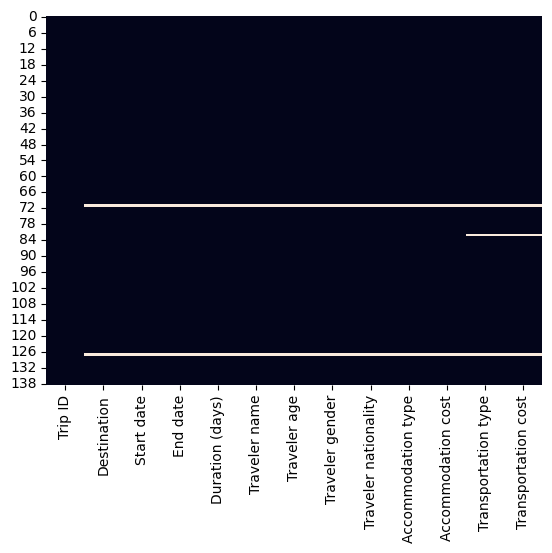

In [11]:
sns.heatmap(df.isnull(),cbar=False) #boşlukları gösteriyor bize görsel olarak

In [13]:
def kullanici_girdilerini_al():
    kalkis_yeri = input("Kalkış yerinizi girin: ")
    varis_noktasi = input("Varış noktanızı girin: ")
    konaklama_suresi = int(input("Konaklama süresini (gün) girin: "))
    kisi_sayisi = int(input("Kişi sayısını girin: "))
    seyahat_turu = input("Seyahat türünü girin (deniz tatili, lezzet turu, kültürel): ")
    butce = float(input("Bütçenizi girin: "))
    odeme_yontemi = input("Ödeme yöntemi girin (kredi kartı veya diğer): ")
    if odeme_yontemi.lower() == 'kredi kartı':
        komisyon = 0.02 * butce  # %2 komisyon
        butce += komisyon
        taksit_sayisi = int(input("Taksit sayısını girin: "))
    else:
        taksit_sayisi = 1
    konaklama_turu = input("Konaklama türünü girin (otel, motel, Airbnb, kamp): ")
    rehber = input("Rehber ister misiniz? (evet veya hayır): ").lower() == 'evet'
    
    return {
        'kalkis_yeri': kalkis_yeri,
        'varis_noktasi': varis_noktasi,
        'konaklama_suresi': konaklama_suresi,
        'kisi_sayisi': kisi_sayisi,
        'seyahat_turu': seyahat_turu,
        'butce': butce,
        'odeme_yontemi': odeme_yontemi,
        'taksit_sayisi': taksit_sayisi,
        'konaklama_turu': konaklama_turu,
        'rehber': rehber
    }

kullanici_girdileri = kullanici_girdilerini_al()


In [25]:
def suggest_plans(df, user_inputs):
    # Kopya oluştur ve filtreleme işlemlerini burada yap
    df_filtered = df.copy()
    
    # Filtreleme: Hedef ve konaklama türüne göre
    df_filtered = df_filtered[
        (df_filtered['Destination'].str.contains(user_inputs['destination'], case=False, na=False)) &
        (df_filtered['Accommodation type'].str.contains(user_inputs['accommodation_type'], case=False, na=False))
    ]
    
    # Dönüşüm: float değerler için hata kontrolü
    df_filtered['Accommodation cost'] = pd.to_numeric(df_filtered['Accommodation cost'], errors='coerce')
    df_filtered['Transportation cost'] = pd.to_numeric(df_filtered['Transportation cost'], errors='coerce')
    
    # Toplam maliyeti hesapla
    df_filtered['Total Cost'] = df_filtered['Accommodation cost'].fillna(0) + df_filtered['Transportation cost'].fillna(0)
    
    # Bütçeye uygun olanları filtrele
    affordable_df = df_filtered[df_filtered['Total Cost'] <= user_inputs['budget']]
    
    # Rastgele indirim uygulama
    discount_rates = [0, 0.05, 0.10]
    affordable_df['Discount Rate'] = np.random.choice(discount_rates, size=len(affordable_df))
    affordable_df['Discounted Cost'] = affordable_df['Total Cost'] * (1 - affordable_df['Discount Rate'])
    
    # İndirimli maliyete göre sırala
    affordable_df = affordable_df.sort_values(by='Discounted Cost')
    
    # İlk 5 öneriyi seç
    top_suggestions = affordable_df.head(5)
    
    return top_suggestions

# Kullanım örneği
user_inputs = {
    'destination': 'Paris',
    'accommodation_type': 'Hotel',
    'budget': 500
}

# Örnek veri seti
data = {
    'Destination': ['Paris', 'Berlin', 'London', 'Paris', 'Rome'],
    'Accommodation type': ['Hotel', 'Hostel', 'Hotel', 'Hotel', 'B&B'],
    'Accommodation cost': ['200', '50', '150', '180', '120'],
    'Transportation cost': ['100', '30', '80', '70', '60']
}

df = pd.DataFrame(data)

# Öneri alma
suggestions = suggest_plans(df, user_inputs)
print(suggestions)

  Destination Accommodation type  Accommodation cost  Transportation cost  \
3       Paris              Hotel                 180                   70   
0       Paris              Hotel                 200                  100   

   Total Cost  Discount Rate  Discounted Cost  
3         250            0.0            250.0  
0         300            0.1            270.0  


In [27]:
def planlari_oner(df, kullanici_girdileri):
    # Varış noktası ve konaklama türüne göre filtreleme
    filtrelenmis_df = df[(df['Destination'].str.contains(kullanici_girdileri['varis_noktasi'], case=False)) &
                         (df['Accommodation type'].str.contains(kullanici_girdileri['konaklama_turu'], case=False))].copy()
    
    # Bütçe, süre ve diğer parametrelere göre daha fazla filtreleme burada yapılabilir
    filtrelenmis_df.loc[:, 'Toplam Maliyet'] = filtrelenmis_df['Accommodation cost'] + filtrelenmis_df['Transportation cost']
    
    # Bütçe türlerini kontrol et
    kullanici_butce = float(kullanici_girdileri['butce'])
    
    # Maliyet ve bütçe karşılaştırması
    uygun_df = filtrelenmis_df[filtrelenmis_df['Toplam Maliyet'] <= kullanici_butce]
    
    # Rastgele indirim uygulama
    indirim_oranlari = [0, 0.05, 0.10]
    uygun_df.loc[:, 'Indirim Oranı'] = np.random.choice(indirim_oranlari, size=len(uygun_df))
    uygun_df.loc[:, 'Indirimli Maliyet'] = uygun_df['Toplam Maliyet'] * (1 - uygun_df['Indirim Oranı'])
    
    # İndirimli maliyete göre sıralama
    uygun_df = uygun_df.sort_values(by='Indirimli Maliyet')
    
    # İlk 5 öneriyi seçme
    en_iyi_oneriler = uygun_df.head(5)
    
    return en_iyi_oneriler

# Veri setinizin sütun isimlerini kontrol edin
print(df.columns)


Index(['Destination', 'Accommodation type', 'Accommodation cost',
       'Transportation cost'],
      dtype='object')


In [28]:
def display_suggestions(suggestions):
    if suggestions.empty:
        print("No suitable plans found within your budget.")
    else:
        print("\nTop Vacation Plans:")
        for idx, row in suggestions.iterrows():
            print(f"\nPlan {idx + 1}:")
            print(f"Destination: {row['Destination']}")
            print(f"Accommodation Type: {row['Accommodation type']}")
            print(f"Transportation Type: {row['Transportation type']}")
            print(f"Duration: {row['Duration (days)']} days")
            print(f"Total Cost: ${row['Total Cost']:.2f}")
            print(f"Discount: {row['Discount Rate'] * 100}%")
            print(f"Discounted Cost: ${row['Discounted Cost']:.2f}")

display_suggestions(suggestions)


Top Vacation Plans:

Plan 4:
Destination: Paris
Accommodation Type: Hotel


KeyError: 'Transportation type'